In [845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# import random
# from skimage import color
# # from sklearn.metrics import confusion_matrix
# from sklearn import metrics
# import seaborn as sns
my_file = pd.read_csv('data.csv')

In [846]:
#displaying first 3 datas
my_file.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [847]:
my_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Pre Processing

In [848]:
#from the info method it is obvious that we have 13 Numerical and 5 Categorical column
#converting categorical to numerical
my_file.date = my_file.date.astype("category").cat.codes
my_file.street = my_file.street.astype("category").cat.codes
my_file.city = my_file.city.astype("category").cat.codes
my_file.statezip = my_file.statezip.astype("category").cat.codes
my_file.country = my_file.country.astype("category").cat.codes
my_file.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0


In [849]:
#normalizing
normalized_file = (my_file-my_file.min() + 1)/(my_file.max()-my_file.min() + 1)
normalized_file.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0.014286,0.011771,0.4,0.277778,0.073723,0.006776,0.428571,0.5,0.2,0.6,0.107400,0.000207,0.486957,0.995533,0.336575,0.840909,0.818182,1.0
1,0.014286,0.089658,0.6,0.388889,0.249108,0.007836,0.571429,0.5,1.0,1.0,0.331932,0.058287,0.191304,0.000496,0.861878,0.818182,0.766234,1.0


### Deviding Dataset

In [850]:
x_training = normalized_file.sample(frac=0.65)
normalized_file = normalized_file.drop(x_training.index)
x_validation = normalized_file.sample(frac=15/35)
x_test = normalized_file.drop(x_validation.index)
# x_test = normalized_file.sample(frac=0.20)

y_training = x_training['price']
x_training.drop('price',inplace=True,axis=1)
y_validation = x_validation['price']
x_validation.drop('price',inplace=True,axis=1)
y_test = x_test['price']
x_test.drop('price',inplace=True,axis=1)

x_training  = x_training.values
y_training  = y_training.values
x_validation  = x_validation.values
y_validation  = y_validation.values
x_test  = x_test.values
y_test  = y_test.values

In [851]:
x_test.shape

(920, 17)

In [852]:
y_test.shape

(920,)

### Creating Model

In [853]:
from keras import layers
model = tf.keras.Sequential()

activation_func = 'linear'
# activation_func = 'relu'

#layer1
model.add(layers.Dense(25, activation=activation_func ,input_shape=(17,)))
model.add(layers.Dropout(0.2))

#layer 2
model.add(layers.Dense(20, activation=activation_func))
model.add(layers.Dropout(0.2))

#last layer
model.add(layers.Dense(1,activation=activation_func))

# model.summary()

#### Compiling the Model

In [854]:
# loss_func = 'categorical_crossentropy'
# loss_func = 'mean_squared_error'
# loss_func = 'mean_absolute_error'
# loss_func = 'mse'
loss_func = 'mae'

optimizer_func = 'adam'
# optimizer_func = tf.keras.optimizers.SGD(learning_rate = 0.1)
# optimizer_func = tf.keras.optimizers.Adagrad(learning_rate = 0.1)

model.compile(loss=loss_func,
              optimizer=optimizer_func,
              metrics=['mse','mae'])

#### Training the Model

In [855]:
import datetime
start = datetime.datetime.now()
trainedModel = model.fit(x_training, y_training, batch_size=128, epochs=35, validation_data = (x_validation,y_validation))
end = datetime.datetime.now()

Epoch 1/35
24/24 [==============================] - 1s 11ms/step - loss: 0.3211 - mse: 0.1674 - mae: 0.3211 - val_loss: 0.0959 - val_mse: 0.0142 - val_mae: 0.0959
Epoch 2/35
24/24 [==============================] - 0s 4ms/step - loss: 0.1825 - mse: 0.0547 - mae: 0.1825 - val_loss: 0.0456 - val_mse: 0.0037 - val_mae: 0.0456
Epoch 3/35
24/24 [==============================] - 0s 4ms/step - loss: 0.1293 - mse: 0.0276 - mae: 0.1293 - val_loss: 0.0258 - val_mse: 0.0012 - val_mae: 0.0258
Epoch 4/35
24/24 [==============================] - 0s 5ms/step - loss: 0.1022 - mse: 0.0172 - mae: 0.1022 - val_loss: 0.0167 - val_mse: 5.4789e-04 - val_mae: 0.0167
Epoch 5/35
24/24 [==============================] - 0s 4ms/step - loss: 0.0878 - mse: 0.0131 - mae: 0.0878 - val_loss: 0.0133 - val_mse: 3.4713e-04 - val_mae: 0.0133
Epoch 6/35
24/24 [==============================] - 0s 4ms/step - loss: 0.0736 - mse: 0.0096 - mae: 0.0736 - val_loss: 0.0097 - val_mse: 1.9237e-04 - val_mae: 0.0097
Epoch 7/35
24/2

In [856]:
print('Training Duration: ', end-start)

Training Duration:  0:00:05.737758


#### Evaluating the Model

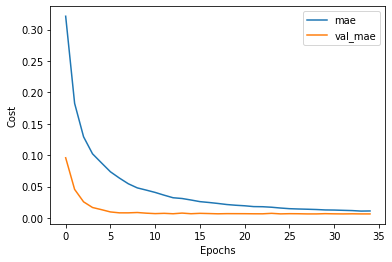

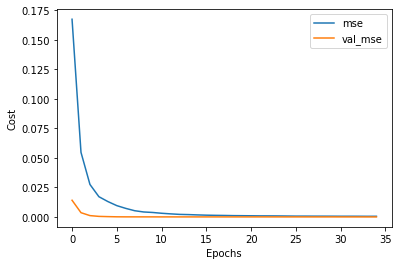

In [857]:
history = trainedModel.history
mae = history['mae']
val_mae = history['val_mae']
mse = history['mse']
val_mse = history['val_mse']

plt.xlabel('Epochs')
plt.ylabel('Cost')
# plt.ylim(0, np.amax(mae)/3)
plt.plot(mae)
plt.plot(val_mae)
plt.legend(['mae','val_mae'])
plt.figure()

plt.xlabel('Epochs')
plt.ylabel('Cost')
# plt.ylim(0, np.amax(mse)/3)
plt.plot(mse)
plt.plot(val_mse)
plt.legend(['mse','val_mse'])

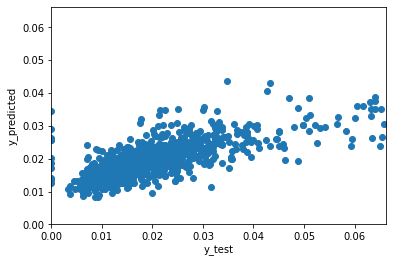

In [858]:
#plotting predicted and real
y_pred = model.predict(x_test)
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.xlim(0, np.amax(y_pred))
plt.ylim(0, np.amax(y_pred))
plt.scatter(y_test, y_pred)